![sutd](img/sutd.png)
## <center>50.040 Natural Language Processing, Summer 2019<center>
<center>**Mini Project**

<center>**Due 17 June 2019, 5pm** <center>

**Write your student ID and name**

ID:1002207

Name:Zeng Yueran

Students with whom you have discussed (if any):Li Xueqing, Du Li

## Introduction

Language models are very useful for a wide range of applications, e.g., speech recognition and machine translation. Consider a sentence consisting of words $x_1, x_2, …, x_m$, where $m$ is the length of the sentence, the goal of language modeling is to model the probability of the sentence, where $m \geq 1$, $x_i \in V $ and $V$ is the vocabulary of the corpus:
$$p(x_1, x_2, …, x_m)$$
In this project, we are going to explore both statistical language model and neural language model on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) datasets.

## Statistical  Language Model

A simple way is to view words as independent random variables (i.e., zero-th order Markovian assumption). The joint probability can be written as:
$$p(x_1, x_2, …, x_m)=\prod_{i=1}^m p(x_i)$$
However, this model ignores the word order information, to account for which, under the first-order Markovian assumption, the joint probability can be written as:
$$p(x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-1})$$
Under the second-order Markovian assumption, the joint probability can be written as:
$$p(x_{-1}, x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-2}, x_{i-1})$$
Similar to what we did in HMM, we will assume that $x_{-1}=START, x_0=START, x_m = STOP$ in this definition, where $START, STOP$ are special symbols referring to the start and the end of a sentence.







### Parameter estimation

Let's use $count(u)$ to denote the number of times the unigram $u$ appears in the corpus, use $count(v, u)$ to denote the number of times the bigram $v, u$ appears in the corpus, and $count(w, v, u)$ the times the trigram $w, v, u$ appears in the corpus, $u \in V \cup STOP$ and $w, v \in V \cup START$.

And the parameters of the unigram, bigram and trigram models can be obtained using maximum likelihood estimation (MLE).

- In the unigram model, the parameters can be estimated as: $$p(u) = \frac {count(u)}{c}$$, where $c$ is the total number of words in the corpus.
- In the bigram model, the parameters can be estimated as:
$$p(u \mid v) = \frac{count(v, u)}{count(v)}$$
- In the trigram model, the parameters can be estimated as:
$$p(u \mid w, v) = \frac{count(w, v, u)}{count(w, v)}$$




### Smoothing the parameters
Note, it is likely that many parameters of bigram and trigram models will be 0 because the relevant bigrams and trigrams involved do not appear in the corpus. If you don't have a way to handle these 0 probabilities, all the sentences that include such bigrams or trigrams will have probabilities of 0.

We'll use a Add-k Smoothing method to fix this problem, the smoothed parameter can be estimated as:
$$p_{add-k}(u)= \frac{count(u)+k}{c+k|V^*|}$$
$$p_{add-k}(u \mid v)= \frac{count(v, u)+k}{count(v)+k|V^*|}$$
$$p_{add-k}(u \mid w, v)= \frac{count(w, v, u)+k}{count(w, v)+k|V^*|}$$

where $k \in (0, 1)$ is the parameter of this approach, and $|V^*|$ is the size of the vocabulary $V^*$,here $V^*= V \cup STOP$. One way to choose the value of $k$ is by
optimizing the perplexity of the development set, namely to choose the value that minimizes the perplexity.



### Perplexity

Given a test set $D^{\prime}$ consisting of sentences $X^{(1)}, X^{(2)}, …, X^{(|D^{\prime}|)}$, each sentence $X^{(j)}$ consists of words $x_1^{(j)}, x_2^{(j)},…,x_{n_j}^{(j)}$, we can measure the probability of each sentence $s_i$, and the quality of the language model would be the probability it assigns to the entire set of test sentences, namely:
$$\prod_j^{D^{\prime}}p(X^{(j)})$$
Let's define average log2 probability as:
$$l=\frac{1}{c^{\prime}}\sum_{j=1}^{|D^{\prime}|}log_2p(X^{(j)})$$
$c^{\prime}$ is the total number of words in the test set, $D^{\prime}$ is the number of sentences. And the perplexity is defined as:
$$perplexity=2^{-l}$$

The lower the perplexity, the better the language model.

#### Task 1 (4 points)
Remove the empty lines in the datasets, convert all the texts to lower cases, then compute counts of unigrams, bigrams, trigrams of the train corpus in the file "wiki.train.tokens". Do not take the START and STOP symbols into consideration for this task.
- List numbers of **unique** unigrams, bigrams and trigrams respectively.
- List 10 most frequent unigrams, bigrams and trigrams as well as their counts.

In [36]:
import pdb
from collections import Counter
from nltk.util import ngrams
with open('wiki.train.tokens', 'r', encoding= 'utf-8') as f:
    all_sentence = []
    unigram, bigram, trigram = [], [], []
    lines = f.readlines()
    for line in lines:
        if not len(line.strip()) == 0:
            all_sentence.append(line.strip().lower())
for l in all_sentence:
    ll = l.split()
    unigram += list(ngrams(ll, 1))
    bigram += list(ngrams(ll, 2)) 
    trigram += list(ngrams(ll, 3))
uni_dic = Counter(unigram).most_common(10)
bi_dic = Counter(bigram).most_common(10)
tri_dic = Counter(trigram).most_common(10)

print(uni_dic)
print(bi_dic)
print(tri_dic)

print(len(set(unigram)), len(set(bigram)), len(set(trigram)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: generator 'ngrams' raised StopIteration
  from ipykernel import kernelapp as app


[(('the',), 130768), ((',',), 99913), (('.',), 73388), (('of',), 57030), (('<unk>',), 54625), (('and',), 50735), (('in',), 44982), (('to',), 39521), (('a',), 36156), (('=',), 29570)]
[(('of', 'the'), 17284), (('=', '='), 17120), (('in', 'the'), 11800), ((',', 'and'), 11668), (('.', 'the'), 11274), ((',', 'the'), 8025), (('<unk>', ','), 7707), (('to', 'the'), 6018), (('on', 'the'), 4503), (('the', '<unk>'), 4394)]
[(('=', '=', '='), 5956), ((',', 'and', 'the'), 1395), ((',', '<unk>', ','), 951), (('<unk>', ',', '<unk>'), 902), (('one', 'of', 'the'), 866), (('<unk>', ',', 'and'), 820), (('.', 'however', ','), 775), (('<unk>', '<unk>', ','), 745), (('.', 'in', 'the'), 726), (('.', 'it', 'was'), 698)]
28911 582654 1355857


###### Task 2 (4 points)

Estimate the parameters for the bigram and trigram models through maximum-likelihood estimation respectively, compute the parameter for each n-gram in the file "ngram.txt", list down the n-grams that have 0 probability. 

Take the START and STOP symbols into consideration. For example, given a sentence "I like NLP", in a bigram model, we need to pad it as "START I like NLP STOP", in a trigram model, we need to pad it as "START START I like NLP STOP".

In [37]:
def read_file_w_pad(path, pad=True):
    with open(path, 'r', encoding= 'utf-8') as f:
        all_sentence = []
        unigram, bigram, trigram = [], [], []
        lines = f.readlines()
        for line in lines:
            if not len(line.strip()) == 0:
                if pad:
                    all_sentence.append('START '+ line.strip().lower()+ ' STOP')
                else:
                    all_sentence.append(line.strip().lower())
    for l in all_sentence:
        ll = l.split()
        unigram += list(ngrams(ll, 1))
        bigram += list(ngrams(ll, 2)) 
        trigram += list(ngrams(ll, 3))
    return unigram, bigram, trigram
unigram, bigram, trigram = read_file_w_pad('wiki.train.tokens')

with open('ngram.txt', 'r') as f:
    uni_dic = dict(Counter(unigram))
    bi_dic = dict(Counter(bigram))
    tri_dic = dict(Counter(trigram))
    zero_gram = []
    for n_gram in f.readlines():
        ngram = tuple(n_gram.split())
        # bigram
        if len(ngram) ==2:
            print(ngram)
            count_v = uni_dic[(ngram[0],)] 
            if ngram in bi_dic.keys():
                count_uv = bi_dic[ngram]
                print(float(count_uv)/count_v)
            else: 
                zero_gram.append(ngram)
                print(0)
        # trigram
        else:
            print(ngram)
            count_vw = bi_dic[(ngram[0], ngram[1])]
            if ngram in tri_dic.keys():
                count_uvw = tri_dic[ngram]
                print(float(count_uvw)/count_vw)
            else: 
                zero_gram.append(ngram)
                print(0)
print('zero probability: '+ str(zero_gram))

('the', 'computer')
9.941270035482687e-05
('go', 'to')
0.132013201320132
('have', 'had')
0.012680115273775217
('and', 'the')
0.08575933773529122
('can', 'sea')
0
('a', 'number', 'of')
0.9573170731707317
('with', 'respect', 'to')
0.5833333333333334
('in', 'terms', 'of')
1.0
('not', 'good', 'bad')
0
('first', 'start', 'with')
0
zero probability: [('can', 'sea'), ('not', 'good', 'bad'), ('first', 'start', 'with')]


#### Task 3 (6 points)
Use the Add-k smoothing method to smooth parameters of bigram and trigram models respectively, choose the parameter $k$ from the set {0.1, 0.3, 0.5, 0.7, 0.9} on the development set for each model. Compute the smoothed parameters of n-grams in the file "ngram.txt". The development data is in the file "wiki.valid.tokens".

In [38]:
##Write your code here
import math
uni_dic = dict(Counter(unigram))
bi_dic = dict(Counter(bigram))
tri_dic = dict(Counter(trigram))
k_list = [0.1, 0.3, 0.5, 0.7, 0.9]

def smooth(n_grams, k, v_star):
    p_list = []
    for n_gram in n_grams:
        if len(n_gram) ==2:
            count_1 = uni_dic[(n_gram[0],)] if (n_gram[0],) in uni_dic.keys() else 0
            count_2 = bi_dic[n_gram] if n_gram in bi_dic.keys() else 0
        elif len(n_gram) ==3:
            count_1 = bi_dic[(n_gram[0], n_gram[1])] if (n_gram[0], n_gram[1]) in bi_dic.keys() else 0
            count_2 = tri_dic[n_gram] if n_gram in tri_dic.keys() else 0
        p_list.append((count_2+k)/(count_1+ k* v_star))
    return p_list

def perplexity(c_prime, p_list): 
    l = 1/c_prime* sum([math.log2(p) for p in p_list])
    return math.pow(2, (-1)*l)

unigram_v, bigram_v, trigram_v = read_file_w_pad('wiki.valid.tokens')
unigram_v_wo_pad, _, __ = read_file_w_pad('wiki.valid.tokens', pad = False)

c_prime = len(unigram_v_wo_pad)
print('c_prime: '+ str(c_prime))
v_star = len(set(uni_dic.keys())) - 1
print('v_star:' + str(v_star))

# bigram
for k in k_list:
    smoo= smooth(bigram_v, k, v_star)
    p = perplexity(c_prime, smoo)
    print(('bigram', k, p))
# trigram
for k in k_list:
    smoo = smooth(trigram_v, k, v_star)
    p = perplexity(c_prime, smoo)
    print(('trigram', k, p))    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: generator 'ngrams' raised StopIteration
  app.launch_new_instance()


c_prime: 213886
v_star:28912
('bigram', 0.1, 801.6838033087178)
('bigram', 0.3, 1146.6665132817234)
('bigram', 0.5, 1392.9508977844434)
('bigram', 0.7, 1597.550332309939)
('bigram', 0.9, 1777.293346480934)
('trigram', 0.1, 5367.212563773941)
('trigram', 0.3, 7524.139414767686)
('trigram', 0.5, 8843.112677317537)
('trigram', 0.7, 9822.275499518588)
('trigram', 0.9, 10606.598097199454)


#### Task 4 (4 points)

Use the smoothed bigram and trigram models to compute the perplexity of the test set in the file  "wiki.test.tokens" respectively. Which model has a lower perplexity?

In [39]:
##Write your code here
k = 0.1
unigram_t, bigram_t, trigram_t = read_file_w_pad('wiki.test.tokens')
unigram_t_wo_pad, _, __ = read_file_w_pad('wiki.test.tokens', pad = False)
c_prime_t = len(unigram_t)
smoo = smooth(bigram_t, k, v_star)
smoo_ = smooth(trigram_t, k, v_star)
p = perplexity(c_prime_t, smoo)
p_ = perplexity(c_prime_t, smoo_)
print(('test bigram', p))
print(('test trigram', p_))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: generator 'ngrams' raised StopIteration
  app.launch_new_instance()


('test bigram', 641.5690273315008)
('test trigram', 4119.601034677775)


## Neural Language Model

Using the chain rule, the probability of a sentence consisting of words $x_1, x_2, ..., x_n$ can be represented as:

$$p(x_1, x_2, ..., x_n) = \prod_{i=1}^n p(x_t \mid x_{t-1}, ..., x_1)$$

Assume that we can use a hidden vector $h_t\in R^d$ of a recurrent neural network (RNN) to record the history information of words:
$$h_t = RNN(x_t, h_{t-1})$$

The conditional probability of word $x_{t+1}$ can be parameterized as:
$$p(x_{t+1} \mid x_{t}, x_{t-1}, ..., x_1) \propto exp(f(w_{x_{t+1}}h_{t}))$$

$d$ is the dimension size of the hidden layer, $|V|$ is the size of the vocabulary. $f$ is a fully-connected layer, where $w \in R^{|V| \times d}$ are the parameters, $w_{x_{t+1}}$ is the parameter in the row that corresponds to the index of $x_{t+1}$ in the vocabulary, the bias is omitted. 



#### Task 5 (12 points)
We will create a LSTM language model, and train it on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) dataset. The data generators(train_iter, valid_iter, test_iter) and the LSTM model(in the file "lstm\_model.py") have been provided. The word embeddings together with the parameters in the LSTM model will be learned from scratch.
Our tasks:
- Complete the training and evaluating code, tune hyperparameters on the validation data, then compute the perplexity of the test data. The test perplexity should be below 150. (5 points)
- Visualize word embeddings trained by our language model as in Homework 1, try to find patterns, i.e., are similar words clustering? (2 points)
- Implement a 2-layer bidirectional LSTM language model as shown in Fig 1, train the language model from both directions, compute the perplexity of the test data for each direction. Note, the forward and backward LSTMs do not share parameters, and the outputs from the previous layer can be only passed to the next layer in the same direction. (5 points)
![bilstm](img/bilstm.png)

<center>Fig 1: 2-layer Bidirectionl LSTM Language Model Architecture

The START and STOP symbols have been added to the sentences in the generators, and the second dimension of the outputs of generators is the index of the batch.

[Pytorch](https://pytorch.org/tutorials/) is required in this part. Do not make any changes to the provided code unless you are requested to do so. 

In [22]:
#load packages
import torchtext
import torch
from torchtext.datasets import WikiText2
from torch import nn, optim
from torchtext import data
from nltk import word_tokenize
from lstm_model import LSTMModel
torch.manual_seed(222)

In [23]:
import nltk
nltk.download('punkt')
  
def tokenizer(text):
    '''Tokenize a string to words'''
    return word_tokenize(text)

#Load and split data into three parts
TEXT = data.Field(lower=True, tokenize=tokenizer, init_token='<sos>')
train, valid, test = WikiText2.splits(TEXT)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
#Build a vocabulary from the train dataset
TEXT.build_vocab(train)
print('Vocabulary size:', len(TEXT.vocab))

Vocabulary size: 28907


In [0]:
#Create data generators
BATCH_SIZE = 64
BPTT_LEN = 32#the length of a text feeding to the RNN layer
train_iter, valid_iter, test_iter = data.BPTTIterator.splits(
    (train, valid, test),
    batch_size=BATCH_SIZE,
    bptt_len=32,
    repeat=False)

In [26]:
len(train_iter)

1096

In [0]:
#Generate a batch of train data
batch = next(iter(train_iter))
text, target = batch.text, batch.target

In [28]:
print('Size of text tensor',text.size())
print('Size of target tensor',target.size())

Size of text tensor torch.Size([32, 64])
Size of target tensor torch.Size([32, 64])


In [30]:
##Write your code here
import numpy as np
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
from tqdm import tqdm_notebook as tqdm
emb_size = 100
hidden_size = 200
num_layer = 2
learning_rate = 0.01
model = LSTMModel(len(TEXT.vocab), emb_size, hidden_size, num_layer).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print('begin training')
epochs = 5

for i in range(epochs):
    model.train()
    train_loss = 0
    hidden = model.init_hidden(BATCH_SIZE)
    hidden = (hidden[0].to(device), hidden[1].to(device))
    for batch in tqdm(train_iter):
        model.zero_grad()
        model.to(device)
        x, y = batch.text.to(device), batch.target.to(device)
        pred, hidden = model(x, hidden)
        loss = criterion(pred.view(-1, len(TEXT.vocab)), y.view(-1))
        train_loss+= loss.item()
        loss.backward()
        optimizer.step()
    print('training loss {:.4f}'.format(train_loss/len(train_iter)))
    
    with torch.no_grad():
      model.eval()
      model.to(device)
      hidden = model.init_hidden(BATCH_SIZE)
      hidden = (hidden[0].to(device), hidden[1].to(device))
      val_loss = 0
      for batch in valid_iter:
          x = batch.text.to(device)
          y = batch.target.to(device)
          pred, hidden = model(x, hidden)
          loss = criterion(pred.view(-1, len(TEXT.vocab)), y.view(-1))
          val_loss += loss.item()
      print('validation loss {:.4f}'.format(val_loss/ len(valid_iter)))
 
            


cuda
begin training


training loss 6.9784
validation loss 5.3873


training loss 5.7245
validation loss 5.0705


training loss 5.4885
validation loss 4.9536


training loss 5.3624
validation loss 4.8787


training loss 5.2729
validation loss 4.8267


In [31]:
# perplexity on test set
with torch.no_grad():
      model.eval()
      hidden = model.init_hidden(BATCH_SIZE)
      hidden = (hidden[0].to(device), hidden[1].to(device))
      test_loss = 0
      perp = 0
      for batch in test_iter:
          x = batch.text.to(device)
          y = batch.target.to(device)
          pred, hidden = model(x, hidden)
          loss = criterion(pred.view(-1, len(TEXT.vocab)), y.view(-1))
          perp += np.exp(loss.item())
      print(perp/len(test_iter)) 

108.11203354011549


In [0]:
# embedding
def pca(X, k=2):
    '''
    PCA algorithms
    Args:
        X: input matrix
        k: number of principal components
    Return:
        the projections on the first k principal components
    '''
    ###################to be completed################
    X_mean = np.mean(X, axis = 0)
    X_normalize = np.subtract(X, np.transpose(X_mean))
    c = np.dot(np.transpose(X_normalize), X_normalize)/(X.shape[0]-1)
    v, w = np.linalg.eig(c)   
    X_pca = np.dot(X_normalize, w)
    ##################################################
    return X_pca[:, :k]

two_d_embeddings = pca(model.encoder.weight.data.cpu().numpy())

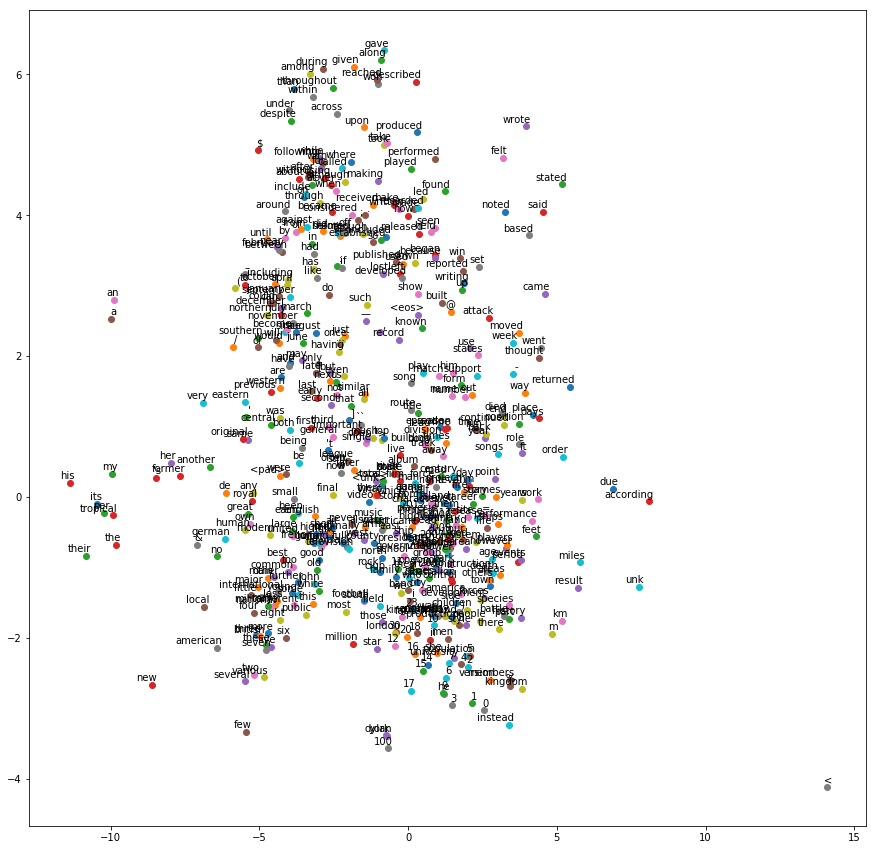

In [33]:
import matplotlib.pyplot as plt
labels = []
for word in TEXT.vocab.stoi:
    labels.append(word)
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
    if i>500:  # print first 500 for a clearer visulisation
      break
    
plot(two_d_embeddings, labels)




# From the plot, we can see clusters with similar meanings together,
# such as a cluster of numerical numbers on the lower-right side, 
# ('seven', 'two', 'eight', 'four', 'five') on the lower-left side


In [34]:
# BiLSTM
class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, emb_size,
                 hidden_size, num_layer, dropout=0.5):
        super(BiLSTMModel, self).__init__()
        self.hidden_size, self.num_layer = hidden_size, num_layer
        self.drop = nn.Dropout(dropout)
        self.encoder = nn.Embedding(vocab_size, emb_size)
        self.rnn_f = nn.LSTM(emb_size, hidden_size, num_layer, dropout=dropout)
        self.rnn_b = nn.LSTM(emb_size, hidden_size, num_layer, dropout=dropout)
        self.decoder = nn.Linear(hidden_size, vocab_size)
        self.softmax = nn.Softmax(dim=2)
        self.init_weights()
 
    def init_weights(self):
        '''Initialize weights'''
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.fill_(0)
        self.decoder.weight.data.uniform_(-initrange, initrange)
    
    def repackage_hidden(self, h):
        """Detach tensor from their history, no gradient backpropaged"""
        return tuple(v.detach() for v in h)
 
    def forward(self, input_tensor_f, input_tensor_b, hidden_f, hidden_b):
        '''
        Args:
            input_tensor: float tensor, size: batch_size*word_num
            hidden: a tuple(LSTM initial states)
        Return:
            outputs: log softmax of prediction scores, word_num*batch_size*vocab_size
            hidden: a tuple(LSTM initial states)
        '''
        #Get embeddings for the input tensors
        emb_f = self.encoder(input_tensor_f)
        emb_b = self.encoder(input_tensor_b)
        #dropout
        emb_f = self.drop(emb_f)
        emb_b = self.drop(emb_b)
        #Remove history of hidden states
        hidden_f = self.repackage_hidden(hidden_f)
        hidden_b = self.repackage_hidden(hidden_b)
        #rnn layer
        output_f, hidden_f = self.rnn_f(emb_f, hidden)
        output_b, hidden_b = self.rnn_b(emb_b, hidden)
        #dropout
        output_f = self.drop(output_f)
        decoded_f = self.decoder(output_f.view(output_f.size(0)*output_f.size(1), output_f.size(2)))
        outputs_f = decoded_f.view(output_f.size(0), output_f.size(1), decoded_f.size(1))
        output_b = self.drop(output_b)
        decoded_b = self.decoder(output_b.view(output_b.size(0)*output_b.size(1), output_b.size(2)))
        outputs_b = decoded_b.view(output_b.size(0), output_b.size(1), decoded_b.size(1))
        
        #Compute the softmax values
        outputs_f = self.softmax(outputs_f)
        #Set the values within a range
        outputs_f = torch.clamp(outputs_f, min=0.000000001, max=100000)
        #Compute log values
        outputs_f = torch.log(outputs_f)
        
        #Compute the softmax values
        outputs_b = self.softmax(outputs_b)
        #Set the values within a range
        outputs_b = torch.clamp(outputs_b, min=0.000000001, max=100000)
        #Compute log values
        outputs_b = torch.log(outputs_b)
        return outputs_f, hidden_f, outputs_b, hidden_b
 
    def init_hidden(self, batch_size):
        '''
        Initialize LSTM hidden states
        '''
        weight = next(self.parameters())
        return (weight.new_zeros(self.num_layer, batch_size, self.hidden_size),
                    weight.new_zeros(self.num_layer, batch_size, self.hidden_size))

      
birnn = BiLSTMModel(len(TEXT.vocab), emb_size, hidden_size, num_layer).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(birnn.parameters(), lr=learning_rate)

epochs = 8
for i in range(epochs):
    birnn.train()
    train_loss_f, train_loss_b = 0, 0
    hidden_f = birnn.init_hidden(BATCH_SIZE)
    hidden_f = (hidden_f[0].to(device), hidden_f[1].to(device))
    hidden_b = birnn.init_hidden(BATCH_SIZE)
    hidden_b = (hidden_b[0].to(device), hidden_b[1].to(device))
    
    for batch in tqdm(train_iter):
        birnn.zero_grad()
        birnn.to(device)
        x_f, y_f = batch.text.to(device), batch.target.to(device)
        x_b, y_b = torch.flip(y_f, [0, 1]), torch.flip(x_f, [0, 1])
        pred_f, hidden_f, pred_b, hidden_b = birnn(x_f, x_b, hidden_f, hidden_b)
        loss_f = criterion(pred_f.view(-1, len(TEXT.vocab)), y_f.view(-1))
        loss_b = criterion(pred_b.view(-1, len(TEXT.vocab)), y_b.view(-1))
        
        train_loss_f+= loss_f.item()
        train_loss_b+= loss_b.item()
        loss = loss_f+loss_b
        loss.backward()
        optimizer.step()
    print('training forward loss {:.4f}, backward loss {:.4f}'.format(train_loss_f/len(train_iter)
                                                               , train_loss_b/len(train_iter)))
       

training forward loss 6.0243, backward loss 6.0297


training forward loss 5.4790, backward loss 5.4616


training forward loss 5.3358, backward loss 5.3105


training forward loss 5.2478, backward loss 5.2224


training forward loss 5.1886, backward loss 5.1597


training forward loss 5.1450, backward loss 5.1137


training forward loss 5.1103, backward loss 5.0785


training forward loss 5.0825, backward loss 5.0506


In [35]:
# perplexity on test set
with torch.no_grad():
      birnn.eval()
      hidden_f = birnn.init_hidden(BATCH_SIZE)
      hidden_f = (hidden_f[0].to(device), hidden_f[1].to(device))
      hidden_b = birnn.init_hidden(BATCH_SIZE)
      hidden_b = (hidden_b[0].to(device), hidden_b[1].to(device))
      
      perp_f, perp_b = 0, 0
      for batch in test_iter:
          x_f, y_f = batch.text.to(device), batch.target.to(device)
          x_b, y_b = torch.flip(y_f, [0, 1]), torch.flip(x_f, [0, 1])
        
          pred_f, hidden_f, pred_b, hidden_b = birnn(x_f, x_b,  hidden_f, hidden_b)
          loss_f = criterion(pred_f.view(-1, len(TEXT.vocab)), y_f.view(-1))
          loss_b = criterion(pred_b.view(-1, len(TEXT.vocab)), y_b.view(-1))
          perp_f += np.exp(loss_f.item())
          perp_b += np.exp(loss_b.item())
      print('forward perplexity: {:.4f}, backward perplexity: {:.4f}'
            .format(perp_f/len(test_iter), perp_b/len(test_iter))) 

forward perplexity: 99.1596, backward perplexity: 99.1251


#### Task 6 (Optional, 6 points)
We can train our 2-layer bidirectional LSTM language model on a relatively large dataset [wikitext-103](https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-v1.zip) and explore some interesting characteristics of the model. Our tasks:
- Generate a piece of text ending with the STOP symbol but no more than 50 words given the START symbol, check whether it is fluent or not based on your tuition.
- Feed each sentence of the movie reviews in homework 1 to our language model, concatenate the outputs of forward and backward LSTMs as the contextualized embedding for each word in the sentence.
- Train the provided RNN Classifier in homework 1 based on the contextualized word embeddings of the train set, tune parameters on the development set and evaluate the performances on the test set.
- Consider “play”, a highly polysemous word, find 20 sentences including "play", half of them refer to the verb, and half of them refer to the noun. Visualize the contextualized embeddings of "play" in the sentences, check whether the embeddings can capture the contextual information or not.

References: 

- [EXPLORING THE LIMITS OF LANGUAGE MODELING](https://arxiv.org/pdf/1602.02410.pdf)
- [IMPROVING NEURAL LANGUAGE MODELS WITH A CONTINUOUS CACHE](https://arxiv.org/pdf/1612.04426.pdf)
- [LEARNING LONGER MEMORY IN RECURRENT NEURAL NETWORKS](https://arxiv.org/pdf/1412.7753.pdf)

In [0]:
##Write your code here

### Requirements:
- This is an individual report.
- Complete the code using Python.
- List students with whom you have discussed if there are any.
- Follow the honor code strictly.

### Free GPU Resources
We suggest that you run neural language models on machines with GPU(s). Google provides the free online platform [Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb), a research tool for machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use as common packages have been  pre-installed. Google users can have access to a Tesla T4 GPU (approximately 15G memory). Note that when you connect to a GPU-based VM runtime, you are given a maximum of 12 hours at a time on the VM.

It is convenient to upload local Jupyter Notebook files and data to Colab, please refer to the [tutorial](https://colab.research.google.com/notebooks/io.ipynb). 

In addition, Microsoft also provides the online platform [Azure Notebooks](https://notebooks.azure.com/help/introduction) for research of data science and machine learning, there are free trials for new users with credits.